In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./te52_edit.jpg')


img_blur = cv2.GaussianBlur(img,(3,3), sigmaX=0, sigmaY=0) 

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=15) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=15) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=15) # Combined X and Y Sobel Edge Detection
 
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
 
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
 
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

-1

In [3]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 
 
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)

-1

In [4]:
print(np.unique(edges))

[  0 255]


In [5]:
edges.shape

(171, 295)

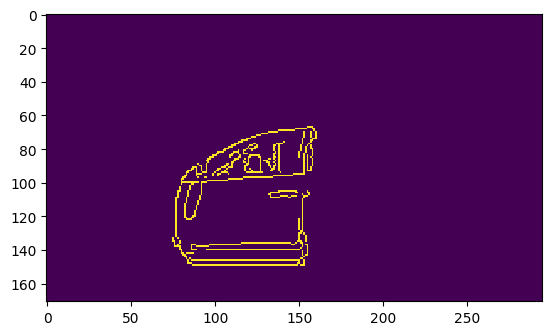

In [6]:
edges = (edges == 255).astype(int)

plt.imshow(edges, interpolation='nearest')
plt.show()

In [8]:
from pycocotools.coco import *


coco = COCO('./output.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [9]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Hood

COCO supercategories: 
root


In [13]:
catIds = coco.getCatIds(catNms=['Hood'])
imgIds = coco.getImgIds(catIds=catIds)
print(imgIds)
imgIds = coco.getImgIds(imgIds = [1160020365])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[2244000789, 1160020365]


In [ ]:
# https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb